<a href="https://www.kaggle.com/code/ahmedmgelwan/neural-network-with-tensorflow?scriptVersionId=227731185" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print('File Path:', os.path.join(dirname, filename))

File Path: /kaggle/input/boston-housing-dataset/HousingData.csv


## Installing `Tensorflow`

In [2]:
!pip install tensorflow -q

## Importing data & Simple Prepration

In [3]:
df = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')
df.dropna(inplace=True)

## Importing Rqquired Libaries

In [4]:
import tensorflow as tf

tf.__version__

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

'2.12.0'

In [5]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')


X = df.drop(columns=['MEDV'])
y = df['MEDV']
cols = X.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=cols)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (315, 13)
y_train: (315,)
X_test: (79, 13)
y_test: (79,)


## Model Building & Training

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [7]:
nn = Sequential()
nn.add(layers.Dense(32, activation='sigmoid', input_shape=(X.shape[1],)))
nn.add(layers.Dense(1, activation='linear'))

In [8]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [9]:
nn.compile(optimizer='sgd',loss='mean_squared_error')

In [10]:
nn.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=80)

Epoch 1/80
10/10 [==============================] - 1s 23ms/step - loss: 196.9344 - val_loss: 46.3225
Epoch 2/80
10/10 [==============================] - 0s 5ms/step - loss: 34.8278 - val_loss: 37.5873
Epoch 3/80
10/10 [==============================] - 0s 5ms/step - loss: 27.3120 - val_loss: 34.7362
Epoch 4/80
10/10 [==============================] - 0s 5ms/step - loss: 24.1290 - val_loss: 32.5000
Epoch 5/80
10/10 [==============================] - 0s 5ms/step - loss: 22.5026 - val_loss: 30.8830
Epoch 6/80
10/10 [==============================] - 0s 5ms/step - loss: 21.6192 - val_loss: 30.2381
Epoch 7/80
10/10 [==============================] - 0s 5ms/step - loss: 20.9622 - val_loss: 31.1599
Epoch 8/80
10/10 [==============================] - 0s 5ms/step - loss: 20.3830 - val_loss: 30.2000
Epoch 9/80
10/10 [==============================] - 0s 5ms/step - loss: 20.0130 - val_loss: 30.6254
Epoch 10/80
10/10 [==============================] - 0s 5ms/step - loss: 19.8453 - val_loss: 30.47

## Model Tesing

In [11]:
preds = nn.predict(X_test).reshape(-1,)

3/3 [==============================] - 0s 3ms/step


In [12]:
result = pd.DataFrame(
    {
        'Actual':y_test.values,
        'Prediction':preds
    }
)

In [13]:
result

,Actual,Prediction
0,32.7,32.135429
1,21.1,21.803949
2,19.1,14.346304
3,24.0,23.263546
4,22.0,26.108057
...,...,...
74,20.6,18.980713
75,19.4,18.627905
76,11.8,13.991213
77,20.7,24.103018


In [14]:
result['Resuidual'] = abs(result['Actual']-result['Prediction'])

In [15]:
result['Resuidual'].sum()/len(result)

2.7544461479669886

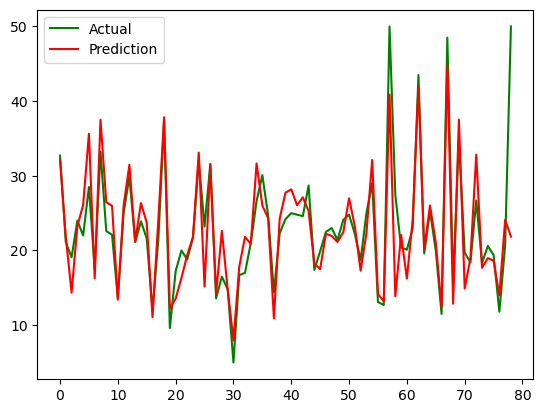

In [16]:
import matplotlib.pyplot as plt

plt.plot(result['Actual'], color='g', label='Actual')
plt.plot(result['Prediction'],color='r',label='Prediction')
plt.legend()
plt.show()